In [1]:
import tensorflow as tf
tf.__version__

2022-07-18 01:06:36.535753: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-18 01:06:36.535796: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.8.0'

In [11]:
mnist=tf.keras.datasets.mnist

In [35]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2674 - accuracy: 0.9225
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1091 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0739 - accuracy: 0.9766


In [36]:
var_loss,var_acc=model.evaluate(x_test,y_test)
print(var_loss,var_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1002 - accuracy: 0.9701
0.10017356276512146 0.9700999855995178


In [37]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

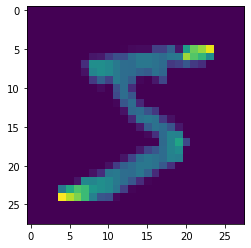

In [39]:
# plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.imshow(x_train[0])
plt.show()

In [40]:
model.save('num_reader_model.model')

2022-07-18 01:29:15.177108: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: num_reader_model.model/assets


In [41]:
new_model=tf.keras.models.load_model('num_reader_model.model')

In [42]:
predictions=new_model.predict([x_test])

In [43]:
print(predictions)

[[1.9791631e-08 3.6602056e-08 1.1238062e-05 ... 9.9988925e-01
  7.6923117e-09 6.4150731e-07]
 [1.5071389e-09 1.3961468e-05 9.9997747e-01 ... 2.1500419e-09
  7.2879438e-08 7.0057696e-11]
 [1.3951338e-07 9.9894899e-01 2.6004508e-04 ... 5.9511460e-04
  3.0160221e-05 2.1596143e-05]
 ...
 [6.8652645e-10 1.8048564e-08 3.6435441e-09 ... 5.6192403e-06
  8.5169148e-07 1.3801885e-04]
 [1.8281708e-05 2.4474559e-06 3.5703617e-06 ... 6.2431736e-06
  5.0747447e-04 3.0703171e-07]
 [1.9312379e-06 3.5867497e-08 2.6138273e-06 ... 1.2725316e-09
  2.0383750e-07 2.4946591e-08]]


In [46]:
import numpy as np
print(np.argmax(predictions[1]))

2


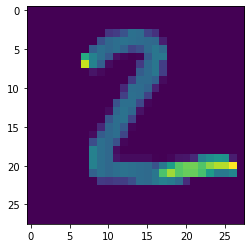

In [47]:
plt.imshow(x_test[1])